In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

In [6]:
def lin_fn(x0, x1, y0, y1, alpha):
    m = (y1 - y0)/(x1 - x0)
    f_alpha = m*(alpha - x0) + y0
    return f_alpha


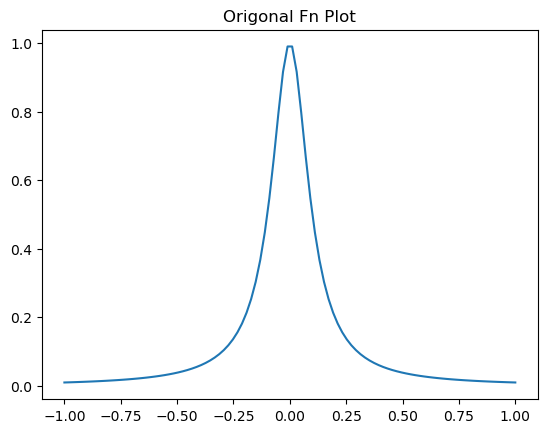

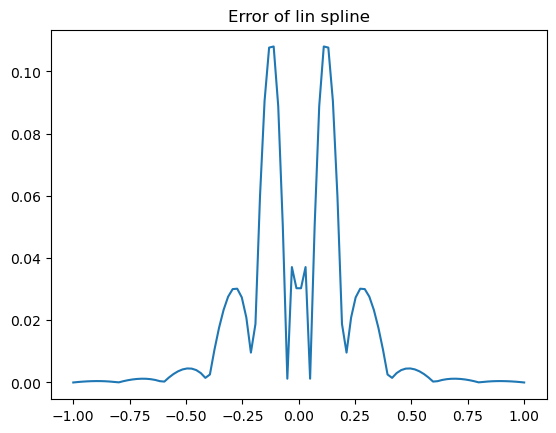

In [17]:
def driver():
    f = lambda x: 1 / (1 + (10 * x) ** 2)
    a, b = -1, 1

    # Create points to evaluate at
    Neval = 100
    xeval = np.linspace(a, b, Neval)

    # Number of intervals
    Nint = 10

    # Evaluate the linear spline
    yeval = eval_lin_spline(xeval, a, b, f, Nint)

    # Evaluate f at the evaluation points
    fex = np.zeros(Neval)
    for j in range(Neval):
        fex[j] = f(xeval[j])  # Corrected function call syntax

    # Plot original function and spline interpolation
    plt.plot(xeval, fex)
    plt.title("Origonal Fn Plot")
    plt.show()

    # Compute and plot the error
    err = np.abs(yeval - fex)
    plt.plot(xeval, err)
    plt.title("Error of lin spline")
    plt.show()

def eval_lin_spline(xeval, a, b, f, Nint):
    """Evaluates the linear spline interpolation at given points."""
    xint = np.linspace(a, b, Nint + 1)  # Interval points
    yeval = np.zeros_like(xeval)  # Initialize evaluation storage

    for jint in range(Nint):
        # Define interval
        a1, b1 = xint[jint], xint[jint + 1]
        fa1, fb1 = f(a1), f(b1)

        # Find indices of xeval within this interval
        ind = np.where((xeval >= a1) & (xeval <= b1))[0]
        n = len(ind)

        # Perform linear interpolation
        for kk in range(n):
            xk = xeval[ind[kk]]
            yeval[ind[kk]] = lin_fn(a1,b1,fa1,fb1,xk)

    return yeval

if __name__ == '__main__':
    driver()


In [ ]:
def driver():

    def f(x):
        return np.exp(x);

    a = 0;
    b = 1;

    ''' number of intervals'''
    Nint = 3;
    xint = np.linspace(a,b,Nint+1);
    yint = f(xint);

    ''' create points you want to evaluate at'''
    Neval = 100;
    xeval =  np.linspace(xint[0],xint[Nint],Neval+1);

#   Create the coefficients for the natural spline
    (A,B,C) = create_natural_spline(yint,xint,Nint);

#  evaluate the cubic spline
    yeval = eval_cubic_spline(xeval,Neval,xint,Nint,A,B,C);


    ''' evaluate f at the evaluation points'''
    fex = f(xeval)

    nerr = norm(fex-yeval)
    print('nerr = ', nerr)

    plt.figure()
    plt.plot(xeval,fex,'ro-',label='exact function')
    plt.plot(xeval,yeval,'bs--',label='natural spline')
    plt.legend
    plt.show()

    err = abs(yeval-fex)
    plt.figure()
    plt.semilogy(xeval,err,'ro--',label='absolute error')
    plt.legend()
    plt.show()

def create_natural_spline(yint,xint,N):

#    create the right  hand side for the linear system
    b = np.zeros(N-1);
#  vector values
    h = np.zeros(N);
    h[0] = xint[1]-xint[0]
    for i in range(1,N):
       h[i] = xint[i+1] - xint[i]
       b[i-1] = ((yint[i+1]-yint[i])/h[i] - (yint[i]-yint[i-1])/h[i-1])/(h[i-1]+h[i]);

#  create the matrix M so you can solve for the A values
    M = np.zeros((N-1,N-1));
    for i in np.arange(N-1):
        M[i,i] = 4/12;

        if i<(N-2):
            M[i,i+1] = h[i+1]/(6*(h[i]+h[i+1]));

        if i>0:
            M[i,i-1] = h[i]/(6*(h[i]+h[i+1]));

# Solve system M*A = b to find coefficients (a[1],a[2],...,a[N-1]).
    A = np.zeros(N+1);
    A[1:N] = np.linalg.solve(M,b)

#  Create the linear coefficients
    B = np.zeros(N)
    C = np.zeros(N)
    for j in range(N):
       B[j] = # find the C coefficients
       C[j] = # find the D coefficients
    return(A,B,C)

def eval_local_spline(xeval,xi,xip,Ai,Aip,B,C):
# Evaluates the local spline as defined in class
# xip = x_{i+1}; xi = x_i
# Aip = A_{i}; Ai = A_{i-1}

    hi = xip-xi;

    yeval =
    return yeval;


def  eval_cubic_spline(xeval,Neval,xint,Nint,A,B,C):

    yeval = np.zeros(Neval+1);

    for j in range(Nint):
        '''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        '''let ind denote the indices in the intervals'''
        atmp = xint[j];
        btmp= xint[j+1];

#   find indices of values of xeval in the interval
        ind= np.where((xeval >= atmp) & (xeval <= btmp));
        xloc = xeval[ind];

# evaluate the spline
        yloc = eval_local_spline(xloc,atmp,btmp,A[j],A[j+1],B[j],C[j])
#   copy into yeval
        yeval[ind] = yloc

    return(yeval)

driver()